###
Úlohy
##
Jsou ženy diskriminované?


DecisionTree

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_dataset = pd.read_csv('C:/Users/LOLSCROL/Datasets/train_dataset.csv')

In [3]:
train_dataset.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,live_region,work_industry,occupation
0,3.10,11,2,0,No,Yes,No,2,SMSA,Other,Other
1,3.24,12,22,2,No,Yes,Yes,3,SMSA,Services Industry,Service Occupation
2,3.00,11,2,0,No,No,No,2,Western Region,Wholesale or Retail,Other
3,6.00,8,44,28,No,No,Yes,0,SMSA,Other,Clerical Occupation
4,5.30,12,7,2,No,No,Yes,1,Western Region,Other,Other


In [4]:
train_dataset.columns

Index(['wage', 'educ', 'exper', 'tenure', 'nonwhite', 'female', 'married',
       'numdep', 'live_region', 'work_industry', 'occupation'],
      dtype='object')

In [5]:
train_dataset.isnull().sum()

wage             0
educ             0
exper            0
tenure           0
nonwhite         0
female           0
married          0
numdep           0
live_region      0
work_industry    0
occupation       0
dtype: int64

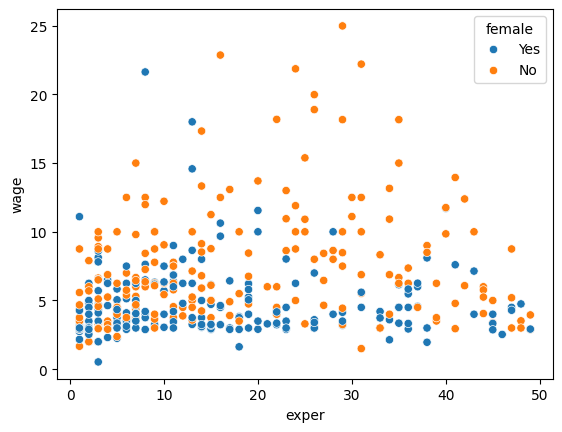

In [6]:
import matplotlib.pyplot as plt

sns.scatterplot(data=train_dataset, x='exper', y='wage', hue='female')

plt.show()

In [7]:
train_dataset['female'] = train_dataset['female'].map({'Yes': 1, 'No': 0})
train_dataset.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,live_region,work_industry,occupation
0,3.10,11,2,0,No,1,No,2,SMSA,Other,Other
1,3.24,12,22,2,No,1,Yes,3,SMSA,Services Industry,Service Occupation
2,3.00,11,2,0,No,0,No,2,Western Region,Wholesale or Retail,Other
3,6.00,8,44,28,No,0,Yes,0,SMSA,Other,Clerical Occupation
4,5.30,12,7,2,No,0,Yes,1,Western Region,Other,Other


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_dt, y_dt = train_dataset[['educ', 'exper', 'female']], train_dataset['wage']
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
model = DecisionTreeRegressor(max_depth=4, random_state=42)
model.fit(X_dt_train, y_dt_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [12]:
y_pred_dt = model.predict(X_dt_test)

In [13]:
train_dataset.columns

Index(['wage', 'educ', 'exper', 'tenure', 'nonwhite', 'female', 'married',
       'numdep', 'live_region', 'work_industry', 'occupation'],
      dtype='object')

In [14]:
# Přidání původního datasetu s genderem a platem do jednoho DataFrame pro graf
comparison_df = X_dt_test.copy()
comparison_df['Actual Salary'] = y_dt_test
comparison_df['Predicted Salary'] = model.predict(X_dt_test)

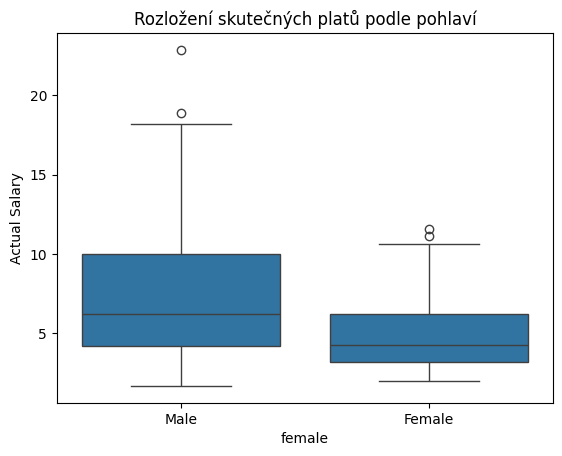

In [15]:
# Box plot skutečných platů podle pohlaví
import matplotlib.pyplot as plt

sns.boxplot(x='female', y='Actual Salary', data=comparison_df)
plt.xticks([0, 1], ['Male', 'Female'])
plt.title("Rozložení skutečných platů podle pohlaví")
plt.show()

In [16]:
import pandas as pd

x_test_df = pd.read_csv('C:/Users/LOLSCROL/Datasets/x_test.csv')

In [17]:
x_test_df.head()

,educ,exper,tenure,nonwhite,female,married,numdep,live_region,work_industry,occupation
0,16,2,2,No,No,Yes,0,SMSA,Wholesale or Retail,Service Occupation
1,14,9,3,No,No,Yes,1,SMSA,Nondur. Manufacturing Industry,Professional Occupation
2,11,1,0,No,No,No,0,Other,Wholesale or Retail,Service Occupation
3,8,45,1,No,Yes,Yes,0,Other,Other,Other
4,14,33,3,No,Yes,Yes,0,SMSA,Professional Services Industry,Service Occupation


In [18]:
x_test_df['female'] = x_test_df['female'].map({'Yes': 1, 'No': 0})
x_test_df.head()

,educ,exper,tenure,nonwhite,female,married,numdep,live_region,work_industry,occupation
0,16,2,2,No,0,Yes,0,SMSA,Wholesale or Retail,Service Occupation
1,14,9,3,No,0,Yes,1,SMSA,Nondur. Manufacturing Industry,Professional Occupation
2,11,1,0,No,0,No,0,Other,Wholesale or Retail,Service Occupation
3,8,45,1,No,1,Yes,0,Other,Other,Other
4,14,33,3,No,1,Yes,0,SMSA,Professional Services Industry,Service Occupation


In [19]:
X_dt, y_dt = x_test_df[['educ', 'exper', 'female']], train_dataset['wage']

In [20]:
x_test_df.shape, train_dataset.shape

((105, 10), (421, 11))

In [21]:
y_pred_dec_tree = model.predict(X_dt)

In [22]:
y_pred_dec_tree

array([ 4.70367349,  6.49456526,  4.70367349,  3.37468754,  4.99490196,
        8.02000046,  3.37468754,  6.49456526, 10.26050001, 13.08818167,
        6.49456526, 13.08818167,  4.29945205,  6.49456526,  4.99490196,
       10.26050001,  6.49456526,  4.29945205,  6.49456526, 24.97999954,
        4.29945205,  4.99490196, 13.08818167, 10.26050001,  4.29945205,
       10.26050001,  6.49456526,  4.29945205,  4.70367349,  4.29945205,
        4.29945205,  4.29945205,  4.29945205, 10.26050001,  3.37468754,
       10.26050001, 10.26050001,  4.99490196,  6.49456526,  4.29945205,
        4.29945205,  3.37468754,  4.29945205,  5.30307695,  4.70367349,
        4.99490196,  6.49456526,  6.49456526,  5.30307695,  5.30307695,
        6.49456526,  4.29945205,  3.37468754,  4.29945205, 10.26050001,
        6.49456526,  6.49456526, 10.26050001,  4.29945205,  4.70367349,
        6.49456526,  6.49456526,  6.49456526,  4.29945205,  6.49456526,
        5.30307695,  3.37468754,  4.70367349,  4.29945205,  6.49

Polynomial features

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [24]:
#train_dataset['female'] = train_dataset['female'].map({'Yes': 1, 'No': 0})
train_dataset.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,live_region,work_industry,occupation
0,3.10,11,2,0,No,1,No,2,SMSA,Other,Other
1,3.24,12,22,2,No,1,Yes,3,SMSA,Services Industry,Service Occupation
2,3.00,11,2,0,No,0,No,2,Western Region,Wholesale or Retail,Other
3,6.00,8,44,28,No,0,Yes,0,SMSA,Other,Clerical Occupation
4,5.30,12,7,2,No,0,Yes,1,Western Region,Other,Other


In [25]:
X_p = train_dataset[['exper', 'female']]
y_poly = train_dataset['wage']

In [26]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_p)

In [27]:
poly.get_feature_names_out()

array(['1', 'exper', 'female', 'exper^2', 'exper female', 'female^2'],
      dtype=object)

In [28]:
import pandas as pd

pd.DataFrame(X_poly, columns=poly.get_feature_names_out())

,1,exper,female,exper^2,exper female,female^2
0,1.0,2.0,1.0,4.0,2.0,1.0
1,1.0,22.0,1.0,484.0,22.0,1.0
2,1.0,2.0,0.0,4.0,0.0,0.0
3,1.0,44.0,0.0,1936.0,0.0,0.0
4,1.0,7.0,0.0,49.0,0.0,0.0
...,...,...,...,...,...,...
416,1.0,39.0,0.0,1521.0,0.0,0.0
417,1.0,5.0,1.0,25.0,5.0,1.0
418,1.0,14.0,1.0,196.0,14.0,1.0
419,1.0,8.0,0.0,64.0,0.0,0.0


In [29]:
model = LinearRegression()

model.fit(X_poly, y_poly)

LinearRegression()

In [30]:
y_train_poly_pred = model.predict(X_poly)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MSE = mean_squared_error(y_poly, y_train_poly_pred)
MAE = mean_absolute_error(y_poly, y_train_poly_pred)
R2 = r2_score(y_poly, y_train_poly_pred)

In [32]:
print(f'MSE: {MSE}')
print(f'MAE: {MAE}')
print(f'R2: {R2}')

MSE: 10.858778942417606
MAE: 2.3459789341193638
R2: 0.20876685035254694


In [33]:
x_test_df.head()

,educ,exper,tenure,nonwhite,female,married,numdep,live_region,work_industry,occupation
0,16,2,2,No,0,Yes,0,SMSA,Wholesale or Retail,Service Occupation
1,14,9,3,No,0,Yes,1,SMSA,Nondur. Manufacturing Industry,Professional Occupation
2,11,1,0,No,0,No,0,Other,Wholesale or Retail,Service Occupation
3,8,45,1,No,1,Yes,0,Other,Other,Other
4,14,33,3,No,1,Yes,0,SMSA,Professional Services Industry,Service Occupation


In [34]:
X_test = x_test_df[['exper', 'female']]
X_test_poly = poly.transform(X_test)

In [35]:
y_pred_poly = model.predict(X_test_poly)

In [36]:
pd.DataFrame(y_pred_poly).to_csv('y_pred_poly.csv', index=False)


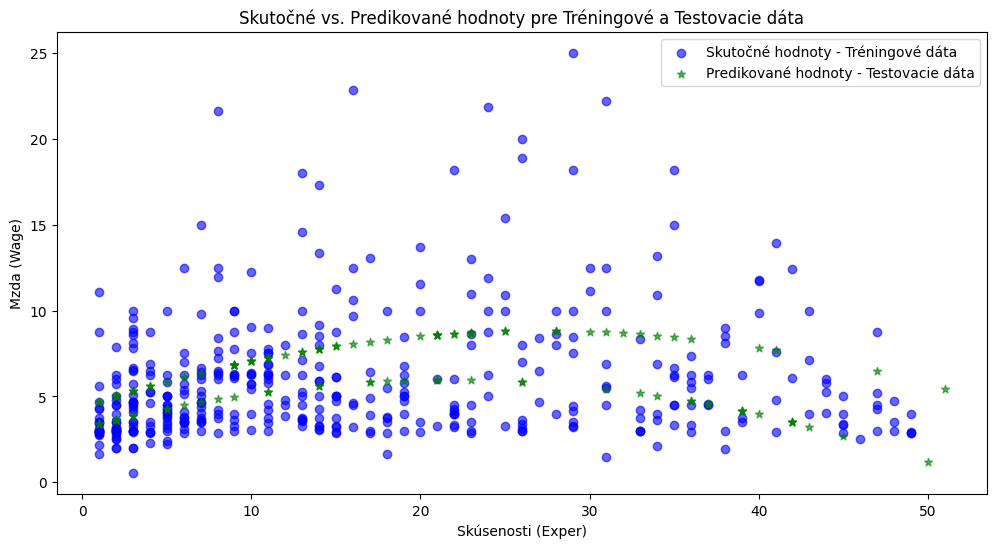

In [37]:
import matplotlib.pyplot as plt


# Nastavenie veľkosti grafu
plt.figure(figsize=(12, 6))

# Tréningové dáta: Skutočné vs. Predikované hodnoty
plt.scatter(X_p['exper'], y_poly, color='blue', label='Skutočné hodnoty - Tréningové dáta', alpha=0.6)

# Testovacie dáta: Predikované hodnoty
plt.scatter(X_test['exper'], y_pred_poly, color='green', label='Predikované hodnoty - Testovacie dáta', marker='*', alpha=0.6)

# Popisky a legenda
plt.xlabel("Skúsenosti (Exper)")
plt.ylabel("Mzda (Wage)")
plt.title("Skutočné vs. Predikované hodnoty pre Tréningové a Testovacie dáta")
plt.legend()

# Zobrazenie grafu
plt.show()

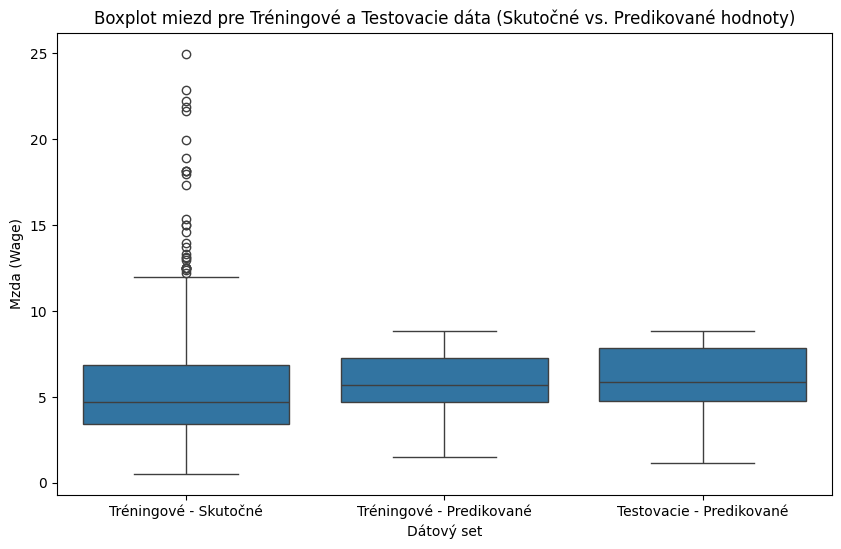

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns


# Vytvorenie dátového rámca s príznakmi pre každú skupinu
data = pd.DataFrame({
    'Hodnota': list(y_poly) + list(y_train_poly_pred) + list(y_pred_poly),
    'Typ': (["Tréningové - Skutočné"] * len(y_poly))
    + (["Tréningové - Predikované"] * len(y_train_poly_pred))
    + (["Testovacie - Predikované"] * len(y_pred_poly)),
})


# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Typ', y='Hodnota', data=data)
plt.xlabel("Dátový set")
plt.ylabel("Mzda (Wage)")
plt.title("Boxplot miezd pre Tréningové a Testovacie dáta (Skutočné vs. Predikované hodnoty)")
plt.show()

Lasso Regression

In [39]:
train_dataset.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,live_region,work_industry,occupation
0,3.10,11,2,0,No,1,No,2,SMSA,Other,Other
1,3.24,12,22,2,No,1,Yes,3,SMSA,Services Industry,Service Occupation
2,3.00,11,2,0,No,0,No,2,Western Region,Wholesale or Retail,Other
3,6.00,8,44,28,No,0,Yes,0,SMSA,Other,Clerical Occupation
4,5.30,12,7,2,No,0,Yes,1,Western Region,Other,Other


In [40]:
#train_dataset['female'] = train_dataset['female'].map({'Yes': 1, 'No': 0})
#train_dataset.head()

In [41]:
train_dataset.columns

Index(['wage', 'educ', 'exper', 'tenure', 'nonwhite', 'female', 'married',
       'numdep', 'live_region', 'work_industry', 'occupation'],
      dtype='object')

In [42]:
print(train_dataset['live_region'].unique())
print(train_dataset['work_industry'].unique())
print(train_dataset['occupation'].unique())

['SMSA' 'Western Region' 'Other' 'Southern Region' 'North Central U.S']
['Other' 'Services Industry' 'Wholesale or Retail'
 'Professional Services Industry' 'Nondur. Manufacturing Industry'
 'Trans, Commun, Pub Ut' 'Construction Industry']
['Other' 'Service Occupation' 'Clerical Occupation'
 'Professional Occupation']


In [43]:
def encode_dummy_variables(X):
    # Mapovanie na binárne hodnoty pre stĺpce 'nonwhite' a 'married'
    X['nonwhite'] = X['nonwhite'].map({'Yes': 1, 'No': 0})
    X['married'] = X['married'].map({'Yes': 1, 'No': 0})

    # Uloženie pôvodného typu pre 'wage', aby sa po konverzii boolov vrátil na float
    wage_dtype = X['wage'].dtype

    # Definovanie referenčných kategórií pre dummy premeny
    reference_region = "SMSA"
    reference_industry = "Other"
    reference_occupation = "Other"

    # Vytvorenie dummy premenných pre 'live_region' bez referenčnej kategórie
    region_dummy = pd.get_dummies(X['live_region'], prefix='live_region')
    region_dummy = region_dummy.loc[:, region_dummy.columns != f'live_region_{reference_region}']

    # Vytvorenie dummy premenných pre 'work_industry' bez referenčnej kategórie
    industry_dummy = pd.get_dummies(X['work_industry'], prefix='work_industry')
    industry_dummy = industry_dummy.loc[:, industry_dummy.columns != f'work_industry_{reference_industry}']

    # Vytvorenie dummy premenných pre 'occupation' bez referenčnej kategórie
    occupation_dummy = pd.get_dummies(X['occupation'], prefix='occupation')
    occupation_dummy = occupation_dummy.loc[:, occupation_dummy.columns != f'occupation_{reference_occupation}']

    # Spojenie dummy premenných s pôvodným DataFrame
    X = pd.concat([X, region_dummy, industry_dummy, occupation_dummy], axis=1)

    # Odstránenie pôvodných kategórií
    X = X.drop(columns=['live_region', 'work_industry', 'occupation'])

    # Konverzia všetkých boolovských stĺpcov na int typ
    X = X.astype(int)

    # Obnovenie typu 'wage' na pôvodný float typ
    X['wage'] = X['wage'].astype(wage_dtype)

    return X

In [44]:
# Aplikovanie funkcie na enkódovanie dummy premenných
encoded_df = encode_dummy_variables(train_dataset)
encoded_df

,wage,educ,exper,tenure,nonwhite,female,married,numdep,live_region_North Central U.S,live_region_Other,...,live_region_Western Region,work_industry_Construction Industry,work_industry_Nondur. Manufacturing Industry,work_industry_Professional Services Industry,work_industry_Services Industry,"work_industry_Trans, Commun, Pub Ut",work_industry_Wholesale or Retail,occupation_Clerical Occupation,occupation_Professional Occupation,occupation_Service Occupation
0,3.0,11,2,0,0,1,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,12,22,2,0,1,1,3,0,0,...,0,0,0,0,1,0,0,0,0,1
2,3.0,11,2,0,0,0,0,2,0,0,...,1,0,0,0,0,0,1,0,0,0
3,6.0,8,44,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5.0,12,7,2,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,6.0,7,39,21,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
417,4.0,16,5,2,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
418,3.0,12,14,2,0,1,1,2,0,0,...,0,0,0,0,0,1,0,1,0,0
419,7.0,13,8,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [45]:
encoded_df.columns

Index(['wage', 'educ', 'exper', 'tenure', 'nonwhite', 'female', 'married',
       'numdep', 'live_region_North Central U.S', 'live_region_Other',
       'live_region_Southern Region', 'live_region_Western Region',
       'work_industry_Construction Industry',
       'work_industry_Nondur. Manufacturing Industry',
       'work_industry_Professional Services Industry',
       'work_industry_Services Industry',
       'work_industry_Trans, Commun, Pub Ut',
       'work_industry_Wholesale or Retail', 'occupation_Clerical Occupation',
       'occupation_Professional Occupation', 'occupation_Service Occupation'],
      dtype='object')

In [46]:
from sklearn.linear_model import Lasso

In [47]:
renamed_columns = {'live_region_North Central U.S': 'live_region_North_Central_U.S',
    'live_region_Southern Region': 'live_region_Southern_Region',
    'live_region_Western Region': 'live_region_Western_Region',
    'work_industry_Construction Industry': 'work_industry_Construction_Industry',
    'work_industry_Nondur. Manufacturing Industry': 'work_industry_Nondur.Manufacturing_Industry',
    'work_industry_Professional Services Industry': 'work_industry_Professional_Services_Industry',
    'work_industry_Services Industry': 'work_industry_Services_Industry',
    'work_industry_Trans, Commun, Pub Ut': 'work_industry_Trans_Commun_Pub_Ut',
    'work_industry_Wholesale or Retail': 'work_industry_Wholesale_or_Retail',
    'occupation_Clerical Occupation': 'occupation_Clerical_Occupation',
    'occupation_Professional Occupation': 'occupation_Professional_Occupation',
}

In [49]:
encoded_df.rename(columns=
   renamed_columns, inplace=True)

In [50]:
encoded_df.columns

Index(['wage', 'educ', 'exper', 'tenure', 'nonwhite', 'female', 'married',
       'numdep', 'live_region_North_Central_U.S', 'live_region_Other',
       'live_region_Southern_Region', 'live_region_Western_Region',
       'work_industry_Construction_Industry',
       'work_industry_Nondur.Manufacturing_Industry',
       'work_industry_Professional_Services_Industry',
       'work_industry_Services_Industry', 'work_industry_Trans_Commun_Pub_Ut',
       'work_industry_Wholesale_or_Retail', 'occupation_Clerical_Occupation',
       'occupation_Professional_Occupation', 'occupation_Service Occupation'],
      dtype='object')

In [51]:
X_train_lasso = encoded_df[['educ', 'exper', 'tenure', 'nonwhite', 'female', 'married',
       'numdep', 'live_region_North_Central_U.S', 'live_region_Other',
       'live_region_Southern_Region', 'live_region_Western_Region',
       'work_industry_Construction_Industry',
       'work_industry_Nondur.Manufacturing_Industry',
       'work_industry_Professional_Services_Industry',
       'work_industry_Services_Industry', 'work_industry_Trans_Commun_Pub_Ut',
       'work_industry_Wholesale_or_Retail', 'occupation_Clerical_Occupation',
       'occupation_Professional_Occupation', 'occupation_Service Occupation' ]]

y_train_lasso = encoded_df['wage']

In [52]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_train_lasso, y_train_lasso)

Lasso(alpha=0.5)

In [53]:
x_test_df.head()

,educ,exper,tenure,nonwhite,female,married,numdep,live_region,work_industry,occupation
0,16,2,2,No,0,Yes,0,SMSA,Wholesale or Retail,Service Occupation
1,14,9,3,No,0,Yes,1,SMSA,Nondur. Manufacturing Industry,Professional Occupation
2,11,1,0,No,0,No,0,Other,Wholesale or Retail,Service Occupation
3,8,45,1,No,1,Yes,0,Other,Other,Other
4,14,33,3,No,1,Yes,0,SMSA,Professional Services Industry,Service Occupation


In [ ]:
#x_test['female'] = x_test['female'].map({'Yes': 1, 'No': 0})
#x_test.head()

In [64]:
def encode_dummy_variables(X):
    # Mapovanie na binárne hodnoty pre stĺpce 'nonwhite' a 'married'
    X['nonwhite'] = X['nonwhite'].map({'Yes': 1, 'No': 0})
    X['married'] = X['married'].map({'Yes': 1, 'No': 0})


    # Definovanie referenčných kategórií pre dummy premeny
    reference_region = "SMSA"
    reference_industry = "Other"
    reference_occupation = "Other"

    # Vytvorenie dummy premenných pre 'live_region' bez referenčnej kategórie
    region_dummy = pd.get_dummies(X['live_region'], prefix='live_region')
    region_dummy = region_dummy.loc[:, region_dummy.columns != f'live_region_{reference_region}']

    # Vytvorenie dummy premenných pre 'work_industry' bez referenčnej kategórie
    industry_dummy = pd.get_dummies(X['work_industry'], prefix='work_industry')
    industry_dummy = industry_dummy.loc[:, industry_dummy.columns != f'work_industry_{reference_industry}']

    # Vytvorenie dummy premenných pre 'occupation' bez referenčnej kategórie
    occupation_dummy = pd.get_dummies(X['occupation'], prefix='occupation')
    occupation_dummy = occupation_dummy.loc[:, occupation_dummy.columns != f'occupation_{reference_occupation}']

    # Spojenie dummy premenných s pôvodným DataFrame
    X = pd.concat([X, region_dummy, industry_dummy, occupation_dummy], axis=1)

    # Odstránenie pôvodných kategórií
    X = X.drop(columns=['live_region', 'work_industry', 'occupation'])

    # Konverzia všetkých boolovských stĺpcov na int typ
    X = X.astype(int)

    return X

In [65]:
# Aplikovanie funkcie na enkódovanie dummy premenných
encoded_x_test = encode_dummy_variables(x_test_df)

In [66]:
encoded_x_test.head()

,educ,exper,tenure,nonwhite,female,married,numdep,live_region_North Central U.S,live_region_Other,live_region_Southern Region,live_region_Western Region,work_industry_Construction Industry,work_industry_Nondur. Manufacturing Industry,work_industry_Professional Services Industry,work_industry_Services Industry,"work_industry_Trans, Commun, Pub Ut",work_industry_Wholesale or Retail,occupation_Clerical Occupation,occupation_Professional Occupation,occupation_Service Occupation
0,16,2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,14,9,3,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,11,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
3,8,45,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,14,33,3,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [67]:
encoded_x_test.rename(columns={
    'live_region_North Central U.S': 'live_region_North_Central_U.S',
    'live_region_Southern Region': 'live_region_Southern_Region',
    'live_region_Western Region': 'live_region_Western_Region',
    'work_industry_Construction Industry': 'work_industry_Construction_Industry',
    'work_industry_Nondur. Manufacturing Industry': 'work_industry_Nondur.Manufacturing_Industry',
    'work_industry_Professional Services Industry': 'work_industry_Professional_Services_Industry',
    'work_industry_Services Industry': 'work_industry_Services_Industry',
    'work_industry_Trans, Commun, Pub Ut': 'work_industry_Trans_Commun_Pub_Ut',
    'work_industry_Wholesale or Retail': 'work_industry_Wholesale_or_Retail',
    'occupation_Clerical Occupation': 'occupation_Clerical_Occupation',
    'occupation_Professional Occupation': 'occupation_Professional_Occupation',
}, inplace=True)

In [68]:
encoded_df.columns

Index(['wage', 'educ', 'exper', 'tenure', 'nonwhite', 'female', 'married',
       'numdep', 'live_region_North_Central_U.S', 'live_region_Other',
       'live_region_Southern_Region', 'live_region_Western_Region',
       'work_industry_Construction_Industry',
       'work_industry_Nondur.Manufacturing_Industry',
       'work_industry_Professional_Services_Industry',
       'work_industry_Services_Industry', 'work_industry_Trans_Commun_Pub_Ut',
       'work_industry_Wholesale_or_Retail', 'occupation_Clerical_Occupation',
       'occupation_Professional_Occupation', 'occupation_Service Occupation'],
      dtype='object')

In [69]:
X_test_lasso = encoded_x_test[['educ', 'exper', 'tenure', 'nonwhite', 'female', 'married',
       'numdep', 'live_region_North_Central_U.S', 'live_region_Other',
       'live_region_Southern_Region', 'live_region_Western_Region',
       'work_industry_Construction_Industry',
       'work_industry_Nondur.Manufacturing_Industry',
       'work_industry_Professional_Services_Industry',
       'work_industry_Services_Industry', 'work_industry_Trans_Commun_Pub_Ut',
       'work_industry_Wholesale_or_Retail', 'occupation_Clerical_Occupation',
       'occupation_Professional_Occupation', 'occupation_Service Occupation']]

In [70]:
y_test_pred = lasso.predict(X_test_lasso)

y_test_pred

array([ 6.42322965,  5.72731513,  3.42061309,  3.1884005 ,  6.36989735,
       10.18779813,  2.92044169,  4.33230982,  5.14544903,  7.85196059,
        5.24241841,  8.68788274,  4.30553556,  6.44009247,  5.59048378,
        5.9010484 ,  5.9990071 ,  4.91143208,  5.19204617, 11.56911689,
        4.29562412,  6.69256038,  8.35826833,  6.69792362,  4.48304394,
        6.35839777,  8.29639652,  4.88465782,  5.89628398,  4.21530135,
        5.33286885,  4.38585834,  5.35565178,  7.32660307,  3.42061309,
        7.99514451, 11.70080123,  4.60837571,  5.26919267,  7.97154653,
        5.30609459,  7.24508265,  8.0280551 ,  5.66047057,  5.00917455,
        5.75250125,  5.33046566,  5.39928886,  0.66909253,  4.70496249,
        4.8439808 ,  6.75087331,  3.47416161,  7.29922999, 10.39662896,
        5.86277457,  7.84282225,  9.18290712,  5.04530338,  4.00110727,
        4.26884986,  3.90868609,  5.11785973,  5.13553759,  5.05281163,
        3.07435209,  1.24104719,  6.53032668,  4.78747223,  5.50

In [71]:
pd.DataFrame(y_test_pred).to_csv('y_pred_lasso.csv', index=False)

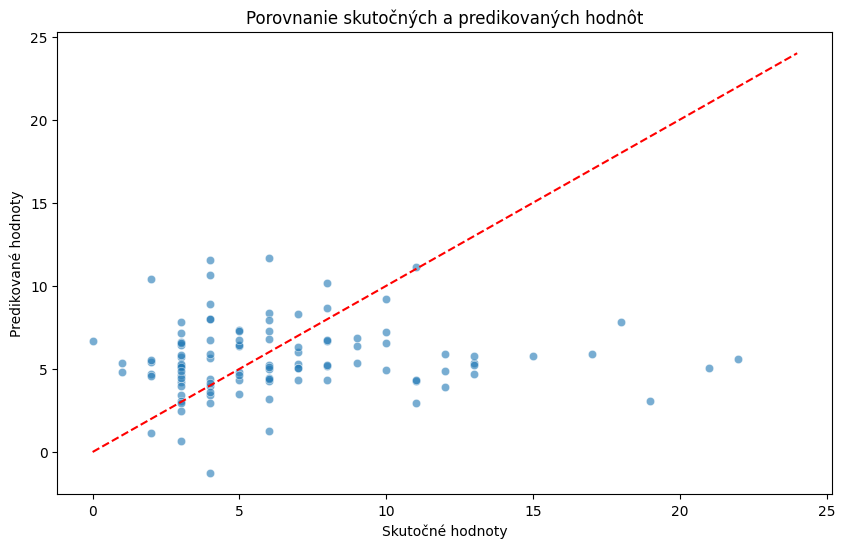

In [73]:
# Import potrebných knižníc
import matplotlib.pyplot as plt
import seaborn as sns

# Vytvorenie DataFrame pre skutočné a predikované hodnoty
results_df = pd.DataFrame({'Skutočné hodnoty': y_train_lasso[:105], 'Predikované hodnoty': y_test_pred})

# Nastavenie veľkosti grafu
plt.figure(figsize=(10, 6))

# Vykreslenie bodového grafu
sns.scatterplot(data=results_df, x='Skutočné hodnoty', y='Predikované hodnoty', alpha=0.6)

# Vykreslenie diagonálnej čiary (ideálny prípad, kde predikcie zodpovedajú skutočným hodnotám)
plt.plot([y_train_lasso.min(), y_train_lasso.max()], [y_train_lasso.min(), y_train_lasso.max()], 'r--')

# Nastavenie popisov osi a nadpisu
plt.xlabel('Skutočné hodnoty')
plt.ylabel('Predikované hodnoty')
plt.title('Porovnanie skutočných a predikovaných hodnôt')

# Zobrazenie grafu
plt.show()

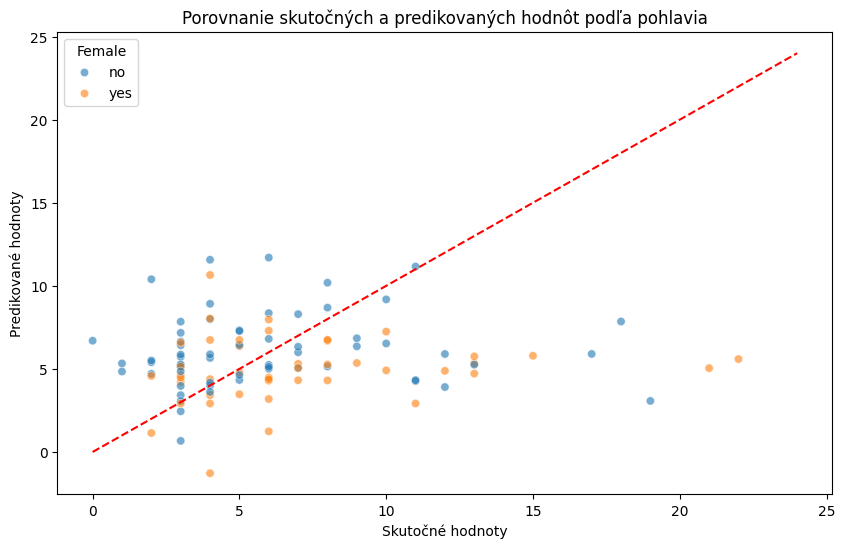

In [75]:
# Predpoklad: 'female' stĺpec obsahuje hodnoty 1 pre ženy a 0 pre mužov.
# Ak hodnoty nemáte v textovom formáte "yes" a "no", môžeme ich konvertovať.
results_df = pd.DataFrame({
    'Skutočné hodnoty': y_train_lasso[:105],
    'Predikované hodnoty': y_test_pred,
    'female': encoded_x_test['female'].replace({1: 'yes', 0: 'no'})  # Ak hodnoty nie sú priamo "yes" a "no"
})

# Nastavenie veľkosti grafu
plt.figure(figsize=(10, 6))

# Vykreslenie bodového grafu s farebným rozlíšením pre 'female'
sns.scatterplot(
    data=results_df,
    x='Skutočné hodnoty',
    y='Predikované hodnoty',
    hue='female',  # Farebný odtieň podľa 'female'
    alpha=0.6
)

# Vykreslenie diagonálnej čiary (ideálny prípad)
plt.plot([y_train_lasso.min(), y_train_lasso.max()], [y_train_lasso.min(), y_train_lasso.max()], 'r--')

# Nastavenie popisov osi a nadpisu
plt.xlabel('Skutočné hodnoty')
plt.ylabel('Predikované hodnoty')
plt.title('Porovnanie skutočných a predikovaných hodnôt podľa pohlavia')

# Zobrazenie legendy
plt.legend(title='Female')

# Zobrazenie grafu
plt.show()